In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_df = pd.read_csv("data/iris/iris.data", 
                      names=["sepal length", "sepal width", 
                             "petal length", "petal width", 
                             "class label"])

X = iris_df[["sepal length", "petal length"]].values
y = iris_df["class label"].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 绘制决策超平面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 绘制样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], 
                    label=f'Class {cl}', edgecolor='black')
        
        # 高亮测试样本
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', 
                        edgecolor='black', alpha=1.0, linewidth=1, 
                        marker='o', s=100, label='Test set')

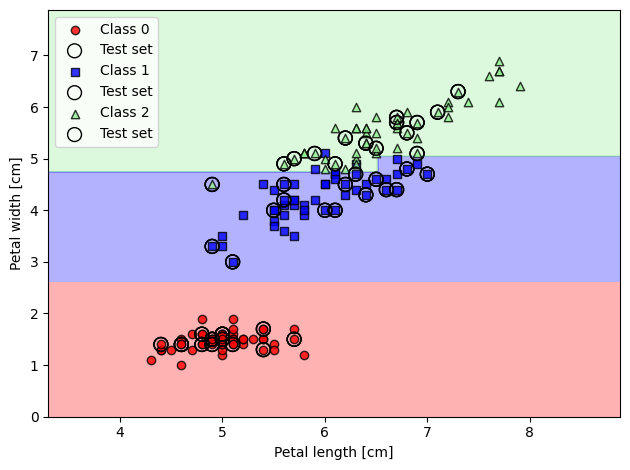

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)


X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

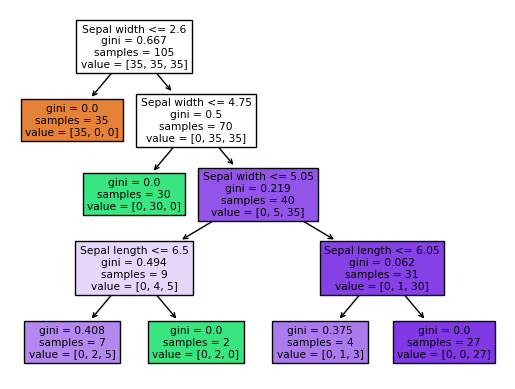

In [4]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

In [5]:
from sklearn.metrics import accuracy_score

y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

print("在训练集上的准确率 {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100))
print("在测试集上的准确率 {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

在训练集上的准确率 97.14%
在测试集上的准确率 97.78%


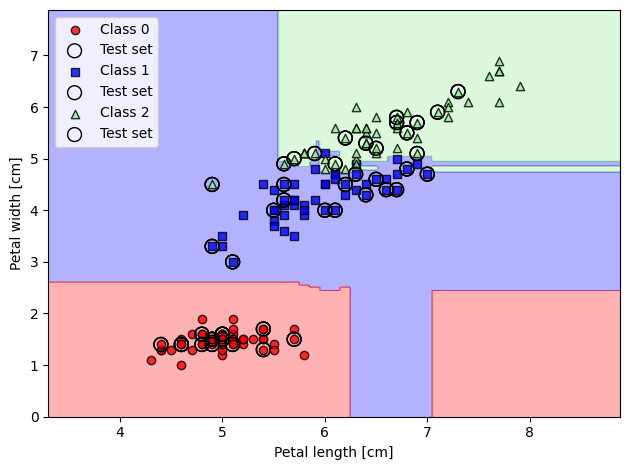

In [6]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print("在训练集上的准确率 {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100))
print("在测试集上的准确率 {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

在训练集上的准确率 99.05%
在测试集上的准确率 95.56%
